# 1 Regressão Linear com uma Variável

In [42]:
import numpy as np  
import pandas as pd  
import matplotlib.pyplot as plt  
%matplotlib inline

Carregando os dados do dataset e armazendo em um array.
Em seguida damos uma rápida visualizada nos dados

In [43]:
x_label = 'Populacao x (10.000)'
y_label = 'Lucro x 10.000'

# Carregar dados
data = pd.read_csv('data/ex1data1.txt', header=None, names=[x_label, y_label])  
data.head() 

,Populacao x (10.000),Lucro x 10.000
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


## 1.1 Visualização dos Dados

Gerando um gráfico de dispersão usando a biblioteca Matplotlib

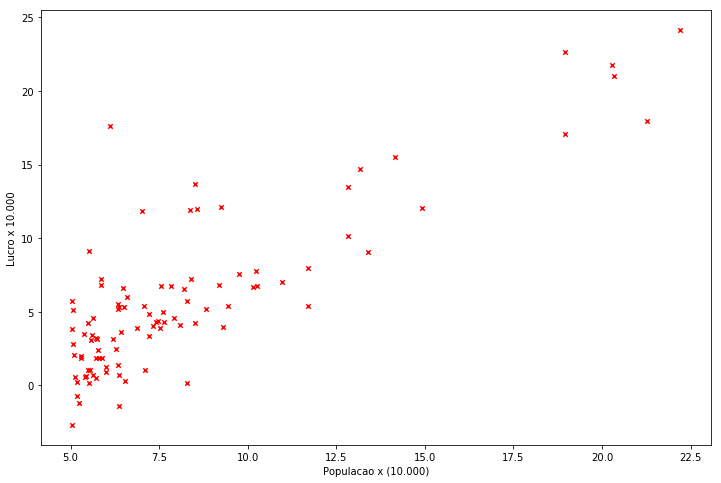

In [44]:
data.plot(kind='scatter', x=x_label, y=y_label, figsize=(12,8), marker='x', color='r')  

## 1.2 Gradiente Descendente

Função **J(theta)** usada para computar o custo da regressão.

In [45]:
def computarCusto(X, y, theta):
    inner = np.power(((X * theta.T) - y), 2)
    return np.sum(inner) / (2 * len(X))

A primeira coluna , será preenchida com numeros 1, represenhta o theta0

In [46]:

data.insert(0, 'Ones', 1)

cols = data.shape[1]  
X = data.iloc[:,0:cols-1]  
y = data.iloc[:,cols-1:cols] 

# convertendo os arrays em matrizes
X = np.matrix(X.values)  
y = np.matrix(y.values)  
theta = np.matrix(np.array([0,0]))

X.shape, theta.shape, y.shape  

((97, 2), (1, 2), (97, 1))

In [47]:
computarCusto(X, y, theta)

32.072733877455676

In [48]:
def gradiente_descendente(X, y, theta, alpha, iters):  
    temp = np.matrix(np.zeros(theta.shape))
    parameters = int(theta.ravel().shape[1])
    cost = np.zeros(iters)

    for i in range(iters):
        error = (X * theta.T) - y

        for j in range(parameters):
            term = np.multiply(error, X[:,j])
            temp[0,j] = theta[0,j] - ((alpha / len(X)) * np.sum(term))

        theta = temp
        cost[i] = computarCusto(X, y, theta)

    return theta, cost

Inicializando os hiperparametros

In [49]:
taxa_aprendizado = 0.01  
max_iteracoes = 1000

matrix([[-3.24140214,  1.1272942 ]])

 executando o gradiente para ajustar o modelo

In [ ]:
g, cost = gradiente_descendente(X, y, theta, taxa_aprendizado, max_iteracoes)  
g  

Computando o custo do theta ( **J(theta)** )

In [50]:
computarCusto(X, y, g)  

4.5159555030789118

Trando a linha de regressão linear sobre os dados

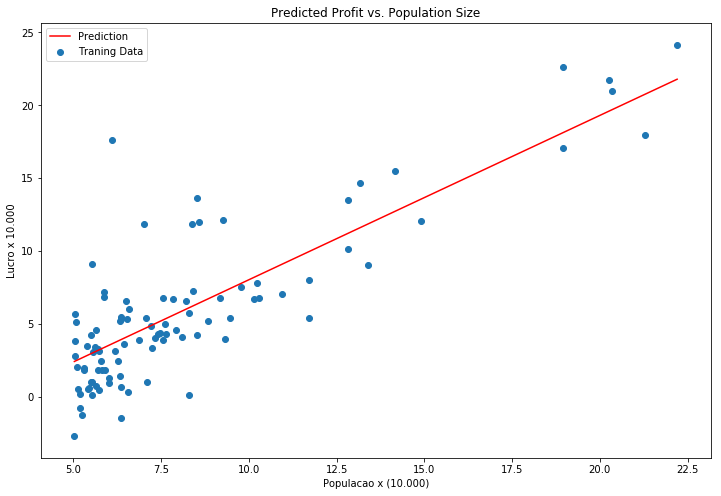

In [51]:
x = np.linspace(data[x_label].min(), data[x_label].max(), 100)  
f = g[0, 0] + (g[0, 1] * x)

fig, ax = plt.subplots(figsize=(12,8))  
ax.plot(x, f, 'r', label='Prediction')  
ax.scatter(data[x_label], data[y_label], label='Traning Data')  
ax.legend(loc=2)  
ax.set_xlabel(x_label)  
ax.set_ylabel(y_label)  
ax.set_title('Predicted Profit vs. Population Size') 

Usando o modelo para fazer previsões para cidades com 35.000 e 70.000 habitantes

In [53]:
m = y.size #quantidade de exemplos de treinamento

it = np.ones(shape=(m, 2))
it = X

iterations = 1500  # quantidade maxima de iterações, evita que o gradiente execute infinitamente
alpha = 0.01       # taxa de aprendizado

custo = computarCusto(it, y, theta)
print("Custo Inicial da função", custo)

theta, J_history = gradiente_descendente(it, y, theta, alpha, iterations)
print("Theta", theta)

Custo 32.0727338775
Theta [[-3.63029144  1.16636235]]
For population = 35,000, we predict a profit of 4519.767868
For population = 70,000, we predict a profit of 45342.450129


#### Fazendo a previsaão para uma cidade com 35.000 habitantes

In [55]:
previsao1 = np.array([1, 3.5]).dot(theta.T).flatten()
print('População 35.000, Lucro presumido %f' % (previsao1 * 10000))

População 35,000, Lucro presumido 4519.767868


#### Fazendo a previsaão para uma cidade com 70.000 habitantes

In [56]:
previsao2 = np.array([1, 7.0]).dot(theta.T).flatten()
print('População 70.000, Lucro presumido %f' % (previsao2 * 10000))

População 70.000, Lucro presumido 45342.450129


Agora iremos analisar a função de custo utilizando um gráfico de contornos

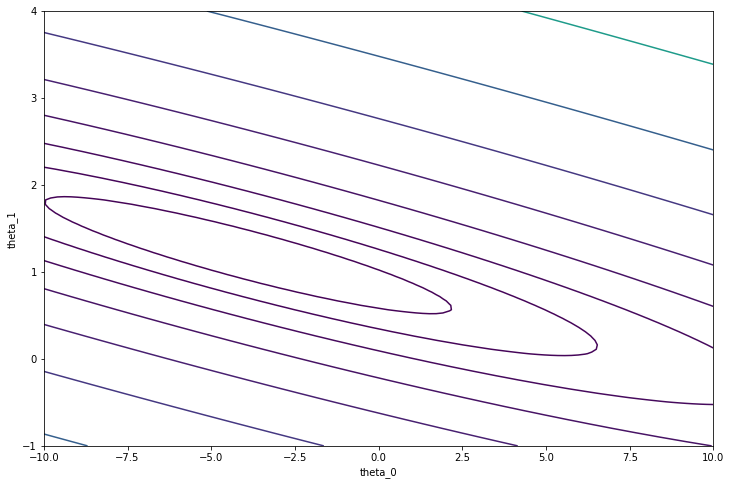

In [54]:
# Matrix de dados simulados
theta0_vals = np.linspace(-10, 10, 100)
theta1_vals = np.linspace(-1, 4, 100)

# inicialiando os valores de J
J_vals = np.zeros(shape=(theta0_vals.size, theta1_vals.size))

for t1, element in enumerate(theta0_vals):
    for t2, element2 in enumerate(theta1_vals):
        thetaT = np.zeros(shape=(2, 1))        
        thetaT[0][0] = element
        thetaT[1][0] = element2
        thetaT = np.matrix(thetaT.T)
        J_vals[t1, t2] = computarCusto(it, y, thetaT)
        
# Gerando o gráfico
J_vals = J_vals.T

plt.figure(figsize=(12,8))

#Plot J_vals as 15 contours spaced logarithmically between 0.01 and 100
plt.contour(theta0_vals, theta1_vals, J_vals, np.logspace(-2, 3, 20))
plt.xlabel('theta_0')
plt.ylabel('theta_1')
plt.show()